### Exercise 5.9
Let the maximum size of the cake 1. Let the number of possible cake values be N=100 so that the increment between each value is 0.01.

In [1]:
import numpy as np

# Set a vecor of discretized cake sizes
w_lb = 1e-2 # lower bound of cake size should not be too small.
w_ub = 1.0
N = 100
w_vec = np.linspace(w_lb,w_ub,N)
print(w_vec)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.  ]


### Exercise 5.10
$V_{T+1}(W^\prime)$ is a column vector of zeros of length N. Assume that the period utility function has the logarithm functional form and that the discount factor is 0.9. What is the resulting policy function $W^\prime=\psi_T(W)$ and value function $V_T(W^\prime)$ when V is defined as the contraction. 

In [2]:
# Choose a utility function u(c)=log(c)
# Set parameters 0.9
def utility(c):
    util = np.log(c)
    return util
beta = 0.9

In [3]:
W=np.tile(w_vec.reshape((N,1)),(1,N))
print(W)
W_prime=np.tile(w_vec.reshape((1,N)),(N,1))
print(W_prime)

[[0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.03 0.03 0.03 ... 0.03 0.03 0.03]
 ...
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [0.99 0.99 0.99 ... 0.99 0.99 0.99]
 [1.   1.   1.   ... 1.   1.   1.  ]]
[[0.01 0.02 0.03 ... 0.98 0.99 1.  ]
 [0.01 0.02 0.03 ... 0.98 0.99 1.  ]
 [0.01 0.02 0.03 ... 0.98 0.99 1.  ]
 ...
 [0.01 0.02 0.03 ... 0.98 0.99 1.  ]
 [0.01 0.02 0.03 ... 0.98 0.99 1.  ]
 [0.01 0.02 0.03 ... 0.98 0.99 1.  ]]


The policy function $\psi_T(W)$ will be an N x 1 column vector that represents the W' value that maximizes the value function for a given W. 

In [29]:
# Create utility matrix
# copying the vector columnwise into n times to the right to fill up the whole matrix
c_mat = (W-W_prime)
print(c_mat)
c_pos = c_mat > 0
print(c_pos)
c_mat[~c_pos] = 1e-7
print(c_mat)
u_mat = utility(c_mat)
print(u_mat)

# Zero or bad consumption for upper body
# all the elements will be negative since we took logarithm.

[[ 0.   -0.01 -0.02 ... -0.97 -0.98 -0.99]
 [ 0.01  0.   -0.01 ... -0.96 -0.97 -0.98]
 [ 0.02  0.01  0.   ... -0.95 -0.96 -0.97]
 ...
 [ 0.97  0.96  0.95 ...  0.   -0.01 -0.02]
 [ 0.98  0.97  0.96 ...  0.01  0.   -0.01]
 [ 0.99  0.98  0.97 ...  0.02  0.01  0.  ]]
[[False False False ... False False False]
 [ True False False ... False False False]
 [ True  True False ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ...  True False False]
 [ True  True  True ...  True  True False]]
[[1.0e-07 1.0e-07 1.0e-07 ... 1.0e-07 1.0e-07 1.0e-07]
 [1.0e-02 1.0e-07 1.0e-07 ... 1.0e-07 1.0e-07 1.0e-07]
 [2.0e-02 1.0e-02 1.0e-07 ... 1.0e-07 1.0e-07 1.0e-07]
 ...
 [9.7e-01 9.6e-01 9.5e-01 ... 1.0e-07 1.0e-07 1.0e-07]
 [9.8e-01 9.7e-01 9.6e-01 ... 1.0e-02 1.0e-07 1.0e-07]
 [9.9e-01 9.8e-01 9.7e-01 ... 2.0e-02 1.0e-02 1.0e-07]]
[[-1.61180957e+01 -1.61180957e+01 -1.61180957e+01 ... -1.61180957e+01
  -1.61180957e+01 -1.61180957e+01]
 [-4.60517019e+00 -1.61180957e+

In [48]:
# One contraction mapping
beta = 0.9

# Assume that V_{T+1}(W')=0 for all W' 
v_prime = np.zeros(N).reshape(N,1) # create matrix of initial guess vector tile it up to N times
v_new_1 = (u_mat + beta*v_prime).max(axis=1)# maximize along the each row, somewhere between the lower diagonal
ind=np.argmax(u_mat + beta*v_prime,axis=1) 
w_vec[ind]

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

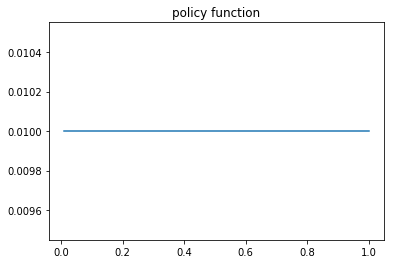

In [49]:
import matplotlib.pyplot as plt
plt.plot(w_vec,w_vec[ind])
plt.title("policy function")
plt.show()

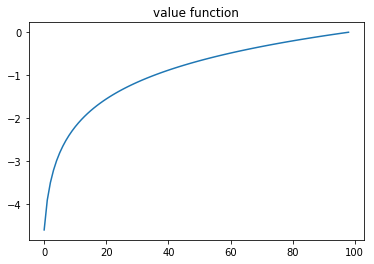

In [50]:
plt.plot(v_new_1[1:])
plt.title("value function")
plt.show()

### Exercise 5.11 
Generate a norm that measures the distance between the two value functions. Define the distance metric as the sum of the squared differences.

In [51]:
# Check distance of ||V_i+t(w)-V_i(w)||
# Create a distance measure
def dist (a,b):
    return ((a - b)**2).sum()
dist1 = dist(v_new_1,v_init)
dist1

133.5146419730059

### Exercise 5.12
Take the resulting $V_{T}$ from the Exercise 5.10, and perform the same contraction on it to generate $V_{T-1}$ and $\psi_{T-1}$.


In [53]:
# second contraction mapping
v_prime = v_new_1
v_init = utility(w_vec)
beta = 0.9
v_prime = np.tile(v_prime.reshape((1,N)),(N,1)) # create matrix of initial guess vector tile it up to N times
v_prime[~c_pos]=-9e+10
v_new_2 = (u_mat + beta*v_prime).max(axis=1) # maximize along the each row, somewhere between the lower diagonal
ind=np.argmax(u_mat + beta*v_prime,axis=1)
w_vec[ind]

array([0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04, 0.05, 0.05, 0.06,
       0.06, 0.07, 0.07, 0.08, 0.08, 0.09, 0.09, 0.1 , 0.1 , 0.1 , 0.11,
       0.11, 0.12, 0.12, 0.13, 0.13, 0.14, 0.14, 0.15, 0.15, 0.16, 0.16,
       0.17, 0.17, 0.18, 0.18, 0.19, 0.19, 0.19, 0.2 , 0.2 , 0.21, 0.21,
       0.22, 0.22, 0.23, 0.23, 0.24, 0.24, 0.25, 0.25, 0.26, 0.26, 0.27,
       0.27, 0.28, 0.28, 0.28, 0.29, 0.29, 0.3 , 0.3 , 0.31, 0.31, 0.32,
       0.32, 0.33, 0.33, 0.34, 0.34, 0.35, 0.35, 0.36, 0.36, 0.37, 0.37,
       0.37, 0.38, 0.38, 0.39, 0.39, 0.4 , 0.4 , 0.41, 0.41, 0.42, 0.42,
       0.43, 0.43, 0.44, 0.44, 0.45, 0.45, 0.46, 0.46, 0.46, 0.47, 0.47,
       0.48])

In [54]:
v_prime

array([[-9.00000000e+10, -9.00000000e+10, -9.00000000e+10, ...,
        -9.00000000e+10, -9.00000000e+10, -9.00000000e+10],
       [-1.61180957e+01, -9.00000000e+10, -9.00000000e+10, ...,
        -9.00000000e+10, -9.00000000e+10, -9.00000000e+10],
       [-1.61180957e+01, -4.60517019e+00, -9.00000000e+10, ...,
        -9.00000000e+10, -9.00000000e+10, -9.00000000e+10],
       ...,
       [-1.61180957e+01, -4.60517019e+00, -3.91202301e+00, ...,
        -9.00000000e+10, -9.00000000e+10, -9.00000000e+10],
       [-1.61180957e+01, -4.60517019e+00, -3.91202301e+00, ...,
        -3.04592075e-02, -9.00000000e+10, -9.00000000e+10],
       [-1.61180957e+01, -4.60517019e+00, -3.91202301e+00, ...,
        -3.04592075e-02, -2.02027073e-02, -9.00000000e+10]])

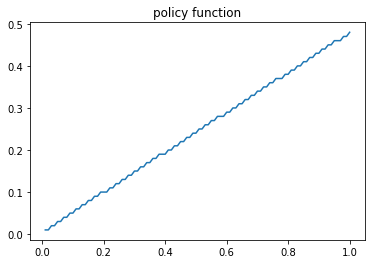

In [55]:
plt.plot(w_vec,w_vec[ind])
plt.title("policy function")
plt.show()

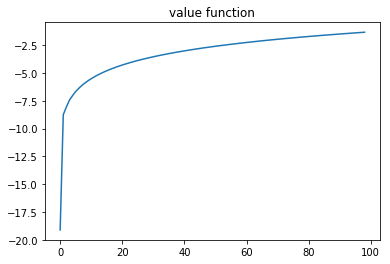

In [56]:
plt.plot(v_new_2[1:],)
plt.title("value function")
plt.show()

In [57]:
#print('v_init',v_init)
#print('v_new',v_new)
dist2 = dist(v_new_1, v_new_2)
print('Distance1=', dist1, 'Distance2=', dist2)
print('Distance1 - Distance2 =', dist1 - dist2)

Distance1= 133.5146419730059 Distance2= 6.561e+21
Distance1 - Distance2 = -6.561e+21


We can check that the distance spiked at the first time.

### Exercise 5.13
Repeat 5.12 and generate value function and policy function by performing the contraction.

In [58]:
# third contraction mapping
v_prime=v_new_2
v_init = utility(w_vec)
beta = 0.9
v_prime = np.tile(v_prime.reshape((1,N)),(N,1)) # create matrix of initial guess vector tile it up to N times
v_prime[~c_pos]=-9e+10
v_new_3 = (u_mat + beta*v_prime).max(axis=1) # maximize along the each row, somewhere between the lower diagonal
ind=np.argmax(u_mat + beta*v_prime,axis=1)
w_vec[ind]

array([0.01, 0.01, 0.02, 0.03, 0.03, 0.04, 0.05, 0.05, 0.06, 0.07, 0.07,
       0.08, 0.09, 0.09, 0.1 , 0.1 , 0.11, 0.12, 0.12, 0.13, 0.14, 0.14,
       0.15, 0.16, 0.16, 0.17, 0.18, 0.18, 0.19, 0.19, 0.2 , 0.2 , 0.21,
       0.22, 0.22, 0.23, 0.24, 0.24, 0.25, 0.26, 0.26, 0.27, 0.28, 0.28,
       0.29, 0.29, 0.3 , 0.31, 0.31, 0.32, 0.33, 0.33, 0.34, 0.35, 0.35,
       0.36, 0.36, 0.37, 0.37, 0.38, 0.39, 0.39, 0.4 , 0.41, 0.41, 0.42,
       0.43, 0.43, 0.44, 0.45, 0.45, 0.46, 0.46, 0.47, 0.48, 0.48, 0.49,
       0.5 , 0.5 , 0.51, 0.52, 0.52, 0.53, 0.53, 0.54, 0.55, 0.55, 0.56,
       0.56, 0.57, 0.58, 0.58, 0.59, 0.6 , 0.6 , 0.61, 0.62, 0.62, 0.63,
       0.64])

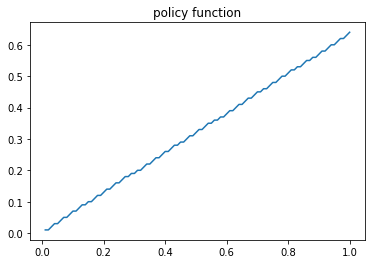

In [61]:
plt.plot(w_vec,w_vec[ind])
plt.title("policy function")
plt.show()

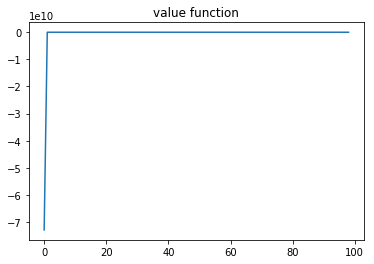

In [62]:
plt.plot(v_new_3[1:],)
plt.title("value function")
plt.show()

In [64]:
#print('v_init',v_init)
#print('v_new',v_new)
dist3 = dist(v_new_2, v_new_3)
print('Distance2=', dist2, 'Distance3=', dist3)
print('Distance2 - Distance3 =', dist2 - dist3)

Distance2= 6.561e+21 Distance3= 5.314410000000002e+21
Distance2 - Distance3 = 1.2465899999999977e+21


We can check that the distance decreased.

### Exercise 5.14
Write a while loop in PAython that performs the contraction operation.

In [65]:
# Initial guess for value function
# Set a vecor of discretized cake sizes
w_lb = 1e-2
w_ub = 1.0
N = 100
v_init = np.zeros_like(w_vec) #v_init = np.zeros(n)
v_init = utility(w_vec)

# Create utility matrix
# copying the vector columnwise into n times to the right to fill up the whole matrix
c_mat = (np.tile(w_vec.reshape((N,1)),(1,N))-
         np.tile(w_vec.reshape((1,N)),(N,1)))
c_pos = c_mat > 0
c_mat[~c_pos] = 1e-7
print(c_mat)
u_mat = utility(c_mat)

maxiters = 500
toler = 1e-10
dist = 10.0
vf_iter = 0
while dist > toler and vf_iter < maxiters:
    vf_iter += 1
    # One contraction mapping
    v_prime = np.tile(v_init.reshape((1,N)),(N,1)) # create matrix of initial guess vector tile it up to N times
    v_prime[~c_pos]=-9e+4
    v_new = (u_mat + beta*v_prime).max(axis=1) # maximize along the each row, somewhere between the lower diagonal
    ind=np.argmax(u_mat + beta*v_prime,axis=1)
    dist = ((v_new - v_init)**2).sum()
    print('Iter=',vf_iter,',distance=',dist)
    v_init = v_new
    
print('yay! done')
print('v(w)',v_init)

[[1.0e-07 1.0e-07 1.0e-07 ... 1.0e-07 1.0e-07 1.0e-07]
 [1.0e-02 1.0e-07 1.0e-07 ... 1.0e-07 1.0e-07 1.0e-07]
 [2.0e-02 1.0e-02 1.0e-07 ... 1.0e-07 1.0e-07 1.0e-07]
 ...
 [9.7e-01 9.6e-01 9.5e-01 ... 1.0e-07 1.0e-07 1.0e-07]
 [9.8e-01 9.7e-01 9.6e-01 ... 1.0e-02 1.0e-07 1.0e-07]
 [9.9e-01 9.8e-01 9.7e-01 ... 2.0e-02 1.0e-02 1.0e-07]]
Iter= 1 ,distance= 6562865744.5285635
Iter= 2 ,distance= 5315921432.356884
Iter= 3 ,distance= 4305896471.418966
Iter= 4 ,distance= 3487776216.5675955
Iter= 5 ,distance= 2825098788.019544
Iter= 6 ,distance= 2288330056.357764
Iter= 7 ,distance= 1853547373.8090138
Iter= 8 ,distance= 1501373394.0455368
Iter= 9 ,distance= 1216112465.4304204
Iter= 10 ,distance= 985051109.6286845
Iter= 11 ,distance= 797891408.7166361
Iter= 12 ,distance= 646292049.0098146
Iter= 13 ,distance= 523496566.09326845
Iter= 14 ,distance= 424032223.8060949
Iter= 15 ,distance= 343466105.6810028
Iter= 16 ,distance= 278207549.28964245
Iter= 17 ,distance= 225348118.14783967
Iter= 18 ,distance=

In [66]:
print(vf_iter)

101


### Exercise 5.15
Plot the policy function for the converged problem.

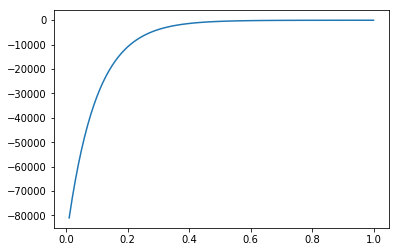

In [67]:
plt.plot(w_vec,v_new)

array([0.01, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98])

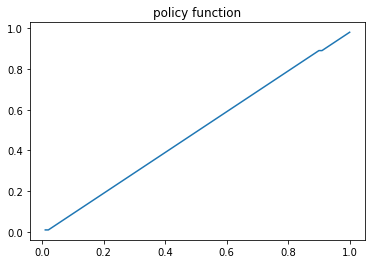

In [69]:
plt.plot(w_vec,w_vec[ind])
plt.title("policy function")
w_vec[ind]

### Exercise 5.16
Approximate the support of $\epsilon$ by generating a row vector of possible values for $\epsilon$. Let the maximum value be three standard deviations above the mean and let the minimum value be three standard deviations below. 

In [71]:
M=7
sigma = 0.5
mu = sigma*4
e_max = mu + 3*sigma
e_min = mu - 3*sigma
e_vec = np.linspace(e_min,e_max,M)
e_vec

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5])

In [72]:
import math
def pdf_normal(mean,sd,val):
    in_paren = (val-mean)**2
    in_paren = (-1)*in_paren/(2*(sd**2))
    mid = math.e**in_paren
    denom = (2*math.pi*(sd**2))**0.5
    return (1/denom)*mid

In [73]:
gamma_vec = []
for e in e_vec:
    gamma_vec.append(pdf_normal(mu,sigma,e))
gamma_vec = np.array(gamma_vec)
print(gamma_vec)

[0.0088637  0.10798193 0.48394145 0.79788456 0.48394145 0.10798193
 0.0088637 ]


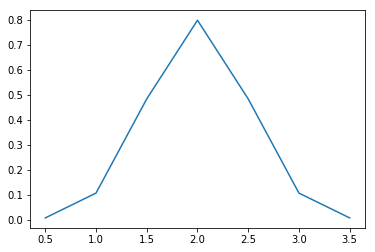

In [74]:
plt.plot(e_vec,gamma_vec)

In [81]:
gamma_vec.reshape((M,1))

array([[0.0088637 ],
       [0.10798193],
       [0.48394145],
       [0.79788456],
       [0.48394145],
       [0.10798193],
       [0.0088637 ]])

### Exercise 5.17
We can do similary as what we did in Exercise 5.9

In [82]:
u_mat

array([[-1.61180957e+01, -1.61180957e+01, -1.61180957e+01, ...,
        -1.61180957e+01, -1.61180957e+01, -1.61180957e+01],
       [-4.60517019e+00, -1.61180957e+01, -1.61180957e+01, ...,
        -1.61180957e+01, -1.61180957e+01, -1.61180957e+01],
       [-3.91202301e+00, -4.60517019e+00, -1.61180957e+01, ...,
        -1.61180957e+01, -1.61180957e+01, -1.61180957e+01],
       ...,
       [-3.04592075e-02, -4.08219945e-02, -5.12932944e-02, ...,
        -1.61180957e+01, -1.61180957e+01, -1.61180957e+01],
       [-2.02027073e-02, -3.04592075e-02, -4.08219945e-02, ...,
        -4.60517019e+00, -1.61180957e+01, -1.61180957e+01],
       [-1.00503359e-02, -2.02027073e-02, -3.04592075e-02, ...,
        -3.91202301e+00, -4.60517019e+00, -1.61180957e+01]])

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
cube = np.array([u_mat*i for i in e_vec])

In [84]:
v_init = np.zeros((N,M)) # NxM matrix
Ev = v_init@gamma_vec.reshape((M,1)) #1x1xN matrix
Ev_mat = np.tile(Ev.reshape((1,N)),(N,1)) # copy it down N rows
Ev_mat[~c_pos]=-9e+10 # replace all the entries
Ev_cub = np.array([Ev_mat for i in range(M)]) # copy it M columns to get N x M x N cube

v_t = cube + beta*Ev_cub # N x M x N matrix representing the period-T value function for any W,eps,W'
v_new_1 = np.zeros((N,M))
w_new_1 = np.zeros((N,M))
for i in range(N):
    v_tw = v_t[:,i,:]
    v_new_1[i]=v_tw.max(axis=1)
    ind = np.argmax(v_tw,axis=1)
    w_new_1[i]=w_vec[ind]
# Take the expectation of Ev by integrating out the eps' dimension
policy_func = np.average(w_new_1,axis=1)
policy_func

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

<function matplotlib.pyplot.show(*args, **kw)>

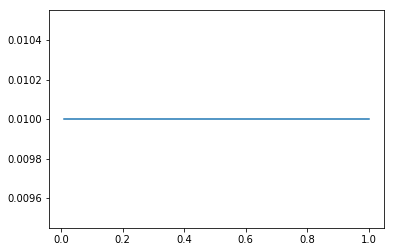

In [85]:
plt.plot(w_vec, policy_func)
plt.show

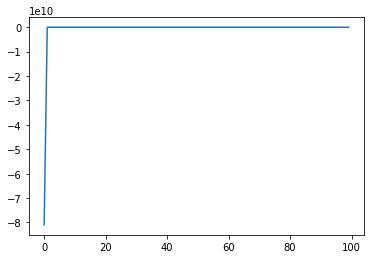

In [86]:
plt.plot(np.average(v_new_1, axis=1))
plt.show()

### Exercise 5.18
Generate a norm that measures the distance between the two value functions.

In [87]:
dist1 = np.sum((v_init.reshape((-1, 1), order="F")-v_new_1.reshape((-1, 1), order="F"))**2) # vec
dist1

4.592700003655584e+22

### Exercise 5.19
Take the resulting V_T from ex 5.17 and perform the same contraction on it to generate V_{T-1} and policy function. 

In [88]:
v_prime = v_new_1
v_init = np.zeros((N,M)) # NxM matrix
Ev = v_prime@gamma_vec.reshape((M,1)) #1x1xN matrix
Ev_mat = np.tile(Ev.reshape((1,N)),(N,1)) # copy it down N rows
Ev_mat[~c_pos]=-9e+10 # replace all the entries
Ev_cub = np.array([Ev_mat for i in range(M)]) # copy it M columns to get N x M x N cube

v_t = cube + beta*Ev_cub # N x M x N matrix representing the period-T value function for any W,eps,W'
v_new_2 = np.zeros((N,M))
w_new_2 = np.zeros((N,M))
for i in range(N):
    v_tw = v_t[:,i,:]
    v_new_2[i]=v_tw.max(axis=1)
    ind = np.argmax(v_tw,axis=1)
    w_new_2[i]=w_vec[ind]
# Take the expectation of Ev by integrating out the eps' dimension
policy_func = np.average(w_new_2,axis=1)
policy_func

array([0.01      , 0.02      , 0.02      , 0.03      , 0.03571429,
       0.04285714, 0.05      , 0.05571429, 0.06285714, 0.07      ,
       0.07571429, 0.08428571, 0.08857143, 0.09571429, 0.10285714,
       0.11142857, 0.11571429, 0.12285714, 0.13142857, 0.13571429,
       0.14428571, 0.14714286, 0.15571429, 0.16428571, 0.16857143,
       0.17857143, 0.18142857, 0.19      , 0.19714286, 0.20285714,
       0.20714286, 0.21571429, 0.22285714, 0.22857143, 0.23714286,
       0.24285714, 0.24857143, 0.25571429, 0.26142857, 0.27      ,
       0.27571429, 0.28142857, 0.29      , 0.29571429, 0.30142857,
       0.31      , 0.31428571, 0.32285714, 0.32857143, 0.33571429,
       0.34142857, 0.35      , 0.35571429, 0.36142857, 0.36714286,
       0.37428571, 0.38285714, 0.39      , 0.39428571, 0.40285714,
       0.40857143, 0.41571429, 0.42285714, 0.42571429, 0.43428571,
       0.44142857, 0.44857143, 0.45571429, 0.46142857, 0.47      ,
       0.47285714, 0.48285714, 0.48714286, 0.49571429, 0.50285

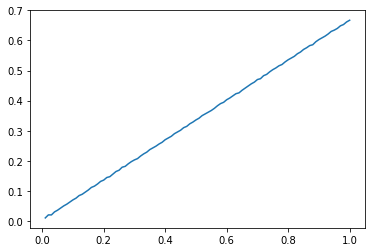

In [89]:
plt.plot(w_vec,policy_func)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

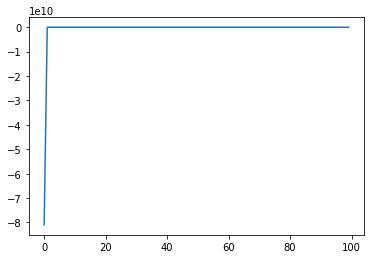

In [90]:
plt.plot(np.average(v_new_1,axis=1))
plt.show

In [91]:
dist2 = np.sum((v_new_2.reshape((-1, 1), order="F")-v_new_1.reshape((-1, 1), order="F"))**2) # vec

print('Distance1=', dist1, 'Distance2=', dist2)
print('Distance1 - Distance2 =', dist1 - dist2)

Distance1= 4.592700003655584e+22 Distance2= 4.592700002611132e+22
Distance1 - Distance2 = 10444521603072.0


We can check that the distance decreased!

### Exercise 5.20
Repeat exercise 5.19 and generate $V_{T-2}$ and $\psi_{T-2}$ by performing the contraction

In [92]:
v_prime = v_new_2
v_init = np.zeros((N,M)) # NxM matrix
Ev = v_prime@gamma_vec.reshape((M,1)) #1x1xN matrix
Ev_mat = np.tile(Ev.reshape((1,N)),(N,1)) # copy it down N rows
Ev_mat[~c_pos]=-9e+10 # replace all the entries
Ev_cub = np.array([Ev_mat for i in range(M)]) # copy it M columns to get N x M x N cube

v_t = cube + beta*Ev_cub # N x M x N matrix representing the period-T value function for any W,eps,W'
v_new_3 = np.zeros((N,M))
w_new_3 = np.zeros((N,M))
for i in range(N):
    v_tw = v_t[:,i,:]
    v_new_3[i]=v_tw.max(axis=1)
    ind = np.argmax(v_tw,axis=1)
    w_new_3[i]=w_vec[ind]
# Take the expectation of Ev by integrating out the eps' dimension
policy_func = np.average(w_new_3,axis=1)
policy_func

array([0.01      , 0.02      , 0.03      , 0.03      , 0.04      ,
       0.05      , 0.05857143, 0.06714286, 0.07571429, 0.08428571,
       0.09285714, 0.10142857, 0.11      , 0.11857143, 0.12714286,
       0.13714286, 0.14285714, 0.15285714, 0.16      , 0.17      ,
       0.17714286, 0.18571429, 0.19428571, 0.20285714, 0.21285714,
       0.22142857, 0.23      , 0.23857143, 0.24428571, 0.25285714,
       0.26142857, 0.27      , 0.28      , 0.28571429, 0.29428571,
       0.30285714, 0.31285714, 0.32      , 0.32857143, 0.33714286,
       0.34571429, 0.35428571, 0.36285714, 0.37      , 0.38      ,
       0.38857143, 0.39571429, 0.40571429, 0.41428571, 0.42285714,
       0.43142857, 0.43857143, 0.44714286, 0.45285714, 0.46285714,
       0.47142857, 0.48142857, 0.49      , 0.49714286, 0.50428571,
       0.51428571, 0.52142857, 0.53142857, 0.54      , 0.54571429,
       0.55571429, 0.56428571, 0.57428571, 0.58142857, 0.59      ,
       0.59857143, 0.60857143, 0.61428571, 0.62285714, 0.63   

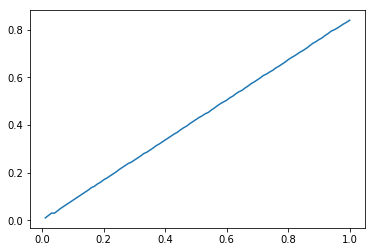

In [93]:
plt.plot(w_vec,policy_func)
plt.show()

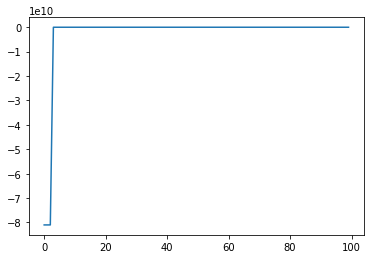

In [94]:
plt.plot(np.average(v_new_3,axis=1))
plt.show()

In [95]:
dist3 = np.sum((v_new_3.reshape((-1, 1), order="F")-v_new_2.reshape((-1, 1), order="F"))**2) # vec

print('Distance2=', dist2, 'Distance3=', dist3)
print('Distance2 - Distance3 =', dist2 - dist3)

Distance2= 4.592700002611132e+22 Distance3= 4.592700000731626e+22
Distance2 - Distance3 = 18795053711360.0


We can check that the distance decreased!

In [96]:
maxiters = 500
toler = 1e-10
dist = 10.0
vf_iter = 0
v_init = np.zeros((N,M))

while dist > toler and vf_iter < maxiters:
    vf_iter += 1
    # One contraction mapping
    Ev = v_init@gamma_vec.reshape((M,1)) #1x1xN matrix
    Ev_mat = np.tile(Ev.reshape((1,N)),(N,1)) # copy it down N rows
    Ev_mat[~c_pos]=-9e+10 # replace all the entries
    Ev_cub = np.array([Ev_mat for i in range(M)]) # copy it M columns to get N x M x N cube

    v_t = cube + beta*Ev_cub # N x M x N matrix representing the period-T value function for any W,eps,W'
    v_new = np.zeros((N,M))
    w_new = np.zeros((N,M))
    for i in range(N):
        v_tw = v_t[:,i,:]
        v_new[i]=v_tw.max(axis=1)
        ind = np.argmax(v_tw,axis=1)
        w_new[i]=w_vec[ind]
    dist = np.sum((v_new.reshape((-1, 1), order="F")-v_init.reshape((-1, 1), order="F"))**2) # vec
    print('Iter=',vf_iter,',distance=',dist)
    v_init = v_new
print('yay! done')

Iter= 1 ,distance= 4.592700003655584e+22
Iter= 2 ,distance= 4.592700002611132e+22
Iter= 3 ,distance= 4.592700000731626e+22
Iter= 4 ,distance= 4.592699997349431e+22
Iter= 5 ,distance= 4.592699991263128e+22
Iter= 6 ,distance= 4.592699980310747e+22
Iter= 7 ,distance= 4.592699960601798e+22
Iter= 8 ,distance= 4.592699925135294e+22
Iter= 9 ,distance= 4.592699861312868e+22
Iter= 10 ,distance= 4.592699746463616e+22
Iter= 11 ,distance= 4.5926995397909756e+22
Iter= 12 ,distance= 4.5926991678811104e+22
Iter= 13 ,distance= 4.592698498625204e+22
Iter= 14 ,distance= 4.592697294292771e+22
Iter= 15 ,distance= 4.592695127088079e+22
Iter= 16 ,distance= 4.592691227197934e+22
Iter= 17 ,distance= 4.59268420936817e+22
Iter= 18 ,distance= 4.592671580927518e+22
Iter= 19 ,distance= 4.5926488566409915e+22
Iter= 20 ,distance= 4.592607966427311e+22
Iter= 21 ,distance= 4.592534391798325e+22
Iter= 22 ,distance= 4.59240201855414e+22
Iter= 23 ,distance= 4.592163892530967e+22
Iter= 24 ,distance= 4.591735643674497e+22


### Exercise 5.22
Make a 3-D surface plot of the policy function for the converged problem, which gives the value of the cake tmr as a function of the cake today and the taste shock today.


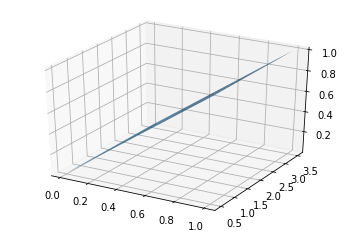

In [97]:
ax = plt.axes(projection='3d')
xdata,ydata = np.meshgrid(w_vec,e_vec)
ax.plot_surface(xdata.T, ydata.T, w_new);